# MT3510 Statistics Project

For the individual statsitics project, you will develop a Monte Carlo (bootstrap) approach to estimating confidence intervals for linear regression. Don't worry if you haven't heard of these before, below is a description of what these and how to do the basics of these in Python.

## Getting help

Questions and queries are permitted, within reason, and can be directed to Dr Swallow or the week 9 & 10 lab demonstrators. The preferred route of contact for outside the lab is email (bts3@).

## Submitting the project

Submission deadline is 5pm Friday 7th April via MySaint/MMS.

Use the cells provided to write the necessary code and (you should not need any additional cells). Submit a single Notebook file (as with the tutorials).

Late submissions will be dealt with using the standard policy (see [here](https://www.st-andrews.ac.uk/mathematics-statistics/students/taught-modules/late-work/)).

## Marking breakdown

| Code  (70%)                   | Written Answers (30%) |
| --------------------------- | ------------------- |
| Correct results (50%)         | Accuracy (20%)        |
| Readability and style (20%)   | Conciseness (10%)     |

# Background

## Linear regression

Simple linear regression is a common statistical model that aims to find the 'best' line through two potentailly related measurements. For example, you may want to know what the relationship is between student's performance in sub-honours (let's call this $x$) and their subsequent performance in honours courses (let's call this $y$). We might think it makes sense that those who get better grades at sub-honours are more likely to perform well at honours level.

To test this, we fit a line of the form:

$$y = \beta_0 + \beta_1 x + \epsilon$$

where $\beta_0$ is called the intercept and represents the performance of a student at honours level who obtained a zero at sub-honours (i.e., $x=0$). $\beta_1$ is called the slope parameter and is a measure of the 'steepness' or gradient of the relationship between the two measurements. $\beta_1$ is the amount by which a student's performance at honours will change for every increase of one in their sub-honours grade. $\epsilon$ is an error term that allows for some difference between the line and the corresponding data point (we don't expect the line to go exactly through all the points).

For example, see the follwing plot: $\beta_0$ is the height on the y-axis of the solid black line; $\beta_1$ is the length of the vertical dotted line, showing the increase in $y$ from $x=3$ to $x=4$.

![Linear regression example](./linreg.jpeg)

## Confidence intervals

Confidence intervals are intervals in statistics that enable us to determine likely plausible values for quantities of interest. The commenest way of estimating these intervals is to use statistical theory to determine the behaviours of our estimates, accounting for the fact that we only ever collect data on a subset of the population we are really interested in. For example, if we wanted to know the average height of students in St Andrews, we would likely not be able to measure the height of every student. Instead, we would measure the height of a sample of students and use this sample to try and make inference about the average height of students. 



An alternative approach to the theoretical estimate of confidence intervals is to use Monte Carlo approaches. Here we randomly sample our data many times with replacement (i.e., observations can be selected multiple times). The idea is, following the student height example, is that if we have collected a random sample from all students, the ones we did not measure should be similar to those we did measure and we can use sampling with replacement to generate alternative scenarios. 

In a Monte Carlo approach to constructing confidence intervals, we:

* generate lots of new datasets from the data we have, of the same dimensions as the original dataset
* fit our statistical model to each of these datasets
* extract the quantity of interest
* repeat many times and create an interval from these

We can then use the estimates of the parameters across all these datasets to determine a range of plausible values for the parameters.


### Fitting a linear regerssion in Python

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

#Combine the X matrix with a (column of) 1s to estimate \beta_0
X = sm.add_constant(np.array([5, 15, 25, 35, 45, 55, 65, 75, 85]).reshape((-1, 1)))
y = np.array([5, 20, 14, 32, 22, 38, 35, 45, 51])
parout=np.zeros([100,2])
mod = sm.OLS(y, X)

res = mod.fit()

# Using print(res.summary()) will give you extensive detailss
# of the model fit

# Print beta_0 and beta_1
print(f'params =', res.params)

# Print exact 95% CI (alpha=0.05) for beta_0 and beta_1
print(f'conf interval =', res.conf_int(0.05))

params = [6.08611111 0.51166667]
conf interval = [[-2.91449454 15.08671676]
 [ 0.338182    0.68515133]]


# Assessment


Scrape the data from [this website on CO2 emissions by country](https://www.worldometers.info/co2-emissions/co2-emissions-by-country/). *(Hint: You may be able to use a similar approach to the IMDB example discussed in the lecture, but now you have multiple entries in the table, not just one)*

*(Additional hint: the `str.replace('a', 'b')` function can be applied to `pandas` DataFrame (column) to replace each recurrence of character `a` with the character `b`.)


Develop a Monte Carlo bootstrap simulation procedure to construct a confidence interval for the two linear regression parameters (intercept and slope) using the scraped data. Assume your response variable (y) is CO2 Emissions (tons, 2016) and your covariate (x) is Population (2016).



1. Write a function called `mcsim(df,N,alpha)` which takes as inputs the `Pandas` dataframe `df` you have scraped, the number `N` of Monte Carlo simulations you require, and the confidence level `alpha`. The function should resample the data `N` times, fit a linear model to each new dataset, and store the estimates of intercept and slope. The function should then return a `Pandas` dataframe output with two columns, 'Intercept' and 'Slope', with the rows being the `N` estimates of the parameters. 

2. Run your function for all combinations of $N\in[100,500,1000]$ and $\alpha\in[0.01,0.05,0.1]$ and store as a dictionary where the keys are of the form `N_alpha`. Produce histograms of your outputs for each combination as subplots in a figure. The rows of subfigures should be increasing N and the columns increasing $\alpha$.

3. Calculate the confidence region for each setting and save to a python dictionary object called `confint`, where the rows are increasing sizes of `N` and the columns are increasing `alpha` and keys are of the form `N_alpha`. 

4. Fit a linear model to the original dataset and extract the exact confidence interval for the two parameters. 

5. Add vertical lines to the histogram to show the exact and approximate regions clearly in different colours and/or line types. Each plot title should portray what the setting values are for that plot.

6. Write a short description (no more than 150 words) on your procedure and comparing your MC estimates with this exact interval in the box below.

In [2]:
#Your Python data scraping code here
import requests
from bs4 import BeautifulSoup


# Get page content
page = requests.get('https://www.worldometers.info/co2-emissions/co2-emissions-by-country/') 
soup = BeautifulSoup(page.content, 'html.parser') 

#row entries are enclosed in <tr> </tr>
table = soup.find_all("tr")


#Individual entries are enclosed in <td></td>
#This part creates arrays with each individual table element separated and appends them to an "entries" array 
entries = []
for tr in table:
    
    row = []
    td = tr.find_all("td")
    
    for i in td:
        row.append(i.text)
        
    entries.append(row)
    

# Creating the lists to add to the data frame and appending the correct parts of "entries" to them
countries, co2_emis, one_year, popul,per_cap, share_world = [],[],[],[],[],[]

for i in range(1,len(entries)):
    
    countries.append(entries[i][1])
    co2_emis.append(entries[i][2])
    one_year.append(entries[i][3])
    popul.append(entries[i][4])
    per_cap.append(entries[i][5])
    share_world.append(entries[i][6])


df = pd.DataFrame({"Country":countries, "CO2 emissions (tons,2016)":co2_emis, "1 year change":one_year, "Population (2016)":popul, "Per capita":per_cap,"Share of world":share_world})

#removing commas using .str.replace()
df["Population (2016)"] = df["Population (2016)"].str.replace(",","")
df["CO2 emissions (tons,2016)"] = df["CO2 emissions (tons,2016)"].str.replace(",","")

#Using integer data types for co2 emissions and population
df['Population (2016)'] = df['Population (2016)'].map(lambda popul: int(popul))
df['CO2 emissions (tons,2016)'] = df['CO2 emissions (tons,2016)'].map(lambda co2: int(co2))
df

,Country,"CO2 emissions (tons,2016)",1 year change,Population (2016),Per capita,Share of world
0,China,10432751400,-0.28%,1414049351,7.38,29.18%
1,United States,5011686600,-2.01%,323015995,15.52,14.02%
2,India,2533638100,4.71%,1324517249,1.91,7.09%
3,Russia,1661899300,-2.13%,145275383,11.44,4.65%
4,Japan,1239592060,-1.21%,127763265,9.70,3.47%
...,...,...,...,...,...,...
204,Anguilla,30262,1.52%,14429,2.10,0.00%
205,Saint Helena,13128,2.62%,5956,2.20,0.00%
206,Saint Pierre & Miquelon,8842,1.51%,5934,1.49,0.00%
207,Faeroe Islands,1953,0.60%,48173,0.04,0.00%


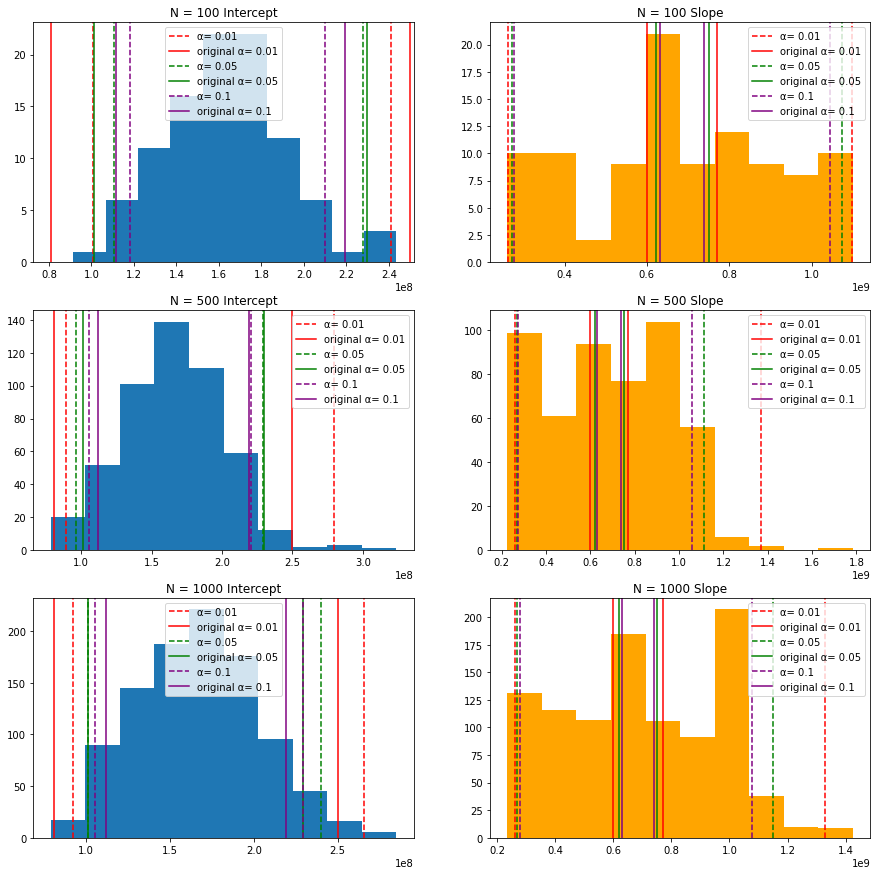

In [3]:
#Your MC simulation code here
import matplotlib.pyplot as plt
import math

#Standardising the independent variable
df['Population (2016)'] = (df['Population (2016)']-df['Population (2016)'].mean())/df['Population (2016)'].std()

def mcsim(df,N):
    
    nsamp = df.shape[0]
    intercept = []
    slope = []
    
    for i in range(N):
        
        #Resampling
        new_sample = np.random.choice(range(nsamp),size=nsamp,replace=True)
        new_data = df.iloc[new_sample]
        
        #Fitting linear model
        
        X = sm.add_constant(new_data["Population (2016)"])
        y = new_data['CO2 emissions (tons,2016)']
        mod = sm.OLS(y, X)
        res = mod.fit()
        
        
        #Appending values for b0 and b1 to slope and intercept arrays
        beta0 = res.params[0]
        beta1 = res.params[1]
        
        
        intercept.append(beta0)
        slope.append(beta1)
        
    return pd.DataFrame({"Intercept":intercept, "Slope":slope})



#Creating Dictionary for question 2

n = [100,500,1000]
dictionary = {}

for i in n:
    
    dictionary[i]= mcsim(df,i)



#Fitting model to original dataset and getting confidence interval for b0 and b1

original_confint = []
X = sm.add_constant(df["Population (2016)"])
y = df['CO2 emissions (tons,2016)']
mod = sm.OLS(y, X)
res = mod.fit()

for z in [0.01,0.05,0.1]:
    
    original_confint.append(res.conf_int(z))
    
    

    
#Plotting and creating confint dictionary

fig = plt.figure("histograms", figsize = (15,15))
confint = {}
subplots = [0,"a","b","c","d","e","f"]


for i in range(1,7,2):

    # n[math.floor((i*3/6))] selects correct n for each loop iteration
    #it does this by mapping 1 to 0 , 3 to 1 and 5 to 2
    current_N = n[math.floor((i*3/6))]
    
    #B0 histogram subplot 
    subplots[i] = fig.add_subplot(3,2,i)
    string = "N = " + str(current_N) + " Intercept"
    subplots[i].set_title(string)
    subplots[i].hist(dictionary[current_N]["Intercept"]) 

    
    #B1 histogram subplot
    subplots[i+1] = fig.add_subplot(3,2,i+1)
    string = "N = " + str(current_N) + " Slope"
    subplots[i+1].set_title(string)
    subplots[i+1].hist(dictionary[current_N]["Slope"] , color = "orange")

    
    #Calculating confidence intervals
    conf_range = [0.01,0.05,0.1]
    
    for x in conf_range:
        
        p1 = ((x)/2.0) * 100
        lower_b0 =  np.percentile(dictionary[current_N]["Intercept"], p1)
        p2 = (1-x+((x)/2.0)) * 100
        upper_b0 =  np.percentile(dictionary[current_N]["Intercept"], p2)
        
        lower_b1 = np.percentile(dictionary[current_N]["Slope"], p1)
        upper_b1 = np.percentile(dictionary[current_N]["Slope"],p2)
        
        
        #Appending to confint dictionary
        
        key = str(current_N)+"_"+str(x)
        confint[key] = [[lower_b0,upper_b0],[lower_b1,upper_b1]]
        
        #Adding confidence intervals to plots
        colours = ["red","green","purple"]
        
        #assigns correct colour on every loop iteration
        turn = conf_range.index(x)
        
        
        #Adding original data confidence interval
        lower_b0_origin = original_confint[turn][0][0]
        upper_b0_origin = original_confint[turn][1][0]
        
        lower_b1_origin = original_confint[turn][0][1]
        upper_b1_origin = original_confint[turn][1][1]
        
        
        #b0 plots
        subplots[i].axvline(x=lower_b0,color=colours[turn],linestyle="--",label = "α= "+str(x))
        subplots[i].axvline(x=upper_b0,color=colours[turn],linestyle="--")
        subplots[i].axvline(x=lower_b0_origin,color=colours[turn],linestyle="-",label = "original α= "+str(x))
        subplots[i].axvline(x=upper_b0_origin,color=colours[turn],linestyle="-")
        subplots[i].legend()
        
        #b1 plots
        subplots[i+1].axvline(x=lower_b1,color=colours[turn],linestyle="--",label = "α= "+str(x))
        subplots[i+1].axvline(x=upper_b1,color=colours[turn],linestyle="--")
        subplots[i+1].axvline(x=lower_b1_origin,color=colours[turn],linestyle="-",label = "original α= "+str(x))
        subplots[i+1].axvline(x=upper_b1_origin,color=colours[turn],linestyle="-")
        subplots[i+1].legend()
        
    

The Monte Carlo estimates for the Intercept display a bell curve around the mean of 1.7x10^8 (Normally distributed), with a slight shift to the left . The confidence intervals also align closely with those of the original data. However, the estimates for the slope are spread out in a way similar to a uniform distribution with high counts for all values between 0.2-1(x10^9), and a shift to the left. The confidence intervals are also much larger compared to those of the original data.
This suggests that the bootstrap simulation is providing a good estimate of the intercept parameter confidence interval. On the other hand the simulation is less accurate when it comes to estimating the slope confidence interval. This could be because the relationship between population and co2 emissions is not well described by a linear model.